# Analysing ADF Output via Jupyter

In addition to running the ADF via Jupyter, the ADF output can also be analyzed in Jupyter Notebooks!

For this example we will explore the run the already done ADF diagnostics for two different CAM simulations for a 5 years, 1995-2000

The test (experiment) case is `f.cam6_3_106.FLTHIST_v0a.ne30.dcs_non-ogw.001`

The baseline (control) case is `f.cam6_3_106.FLTHIST_v0a.ne30.dcs_effgw_rdg.001`

In [ ]:
%matplotlib inline

In [ ]:
import os.path
from pathlib import Path
import sys

In [ ]:
# Determine ADF directory path
# If it is in your cwd, set adf_path = local_path, 
# otherwise set adf_path appropriately

local_path = os.path.abspath('')

#### It is important to remember the <strong>two</strong> things important in this notebook are the:
    * ADF branch you want, which will also be dependent on adf_path
    * Config yaml file you want

##### ADF location

* NOTE: you will have to change the branch via terminal if you want a certain branch in this notebook

Or you could use a cell to do it:

    !git checkout <your-branch>

In [ ]:
# You can change the path to ADF (git branch) so it can be different than the
# current location

#adf_path = "/path/to/your/ADF"
adf_path = "/glade/work/richling/ADF/ADF_dev/Justin_ADF/ADF"

print(f"current working directory = {local_path}")
print(f"ADF path                  = {adf_path}")

current working directory = /glade/work/richling/ADF/adf-tutorials/ADF-Tutorial/notebooks/run
ADF path                  = /glade/work/richling/ADF/ADF_dev/Justin_ADF/ADF


In [ ]:
#set path to ADF lib
lib_path = os.path.join(adf_path,"lib")
print(f"The lib scripts live here, right? {lib_path}")

#set path to ADF plotting scripts directory
plotting_scripts_path = os.path.join(adf_path,"scripts","plotting")
print(f"The plotting scripts live here, right? {plotting_scripts_path}")

#Add paths to python path:
sys.path.append(lib_path)
sys.path.append(plotting_scripts_path)

The lib scripts live here, right? /glade/work/richling/ADF/ADF_dev/Justin_ADF/ADF/lib
The plotting scripts live here, right? /glade/work/richling/ADF/ADF_dev/Justin_ADF/ADF/scripts/plotting


In [ ]:
#import ADF diagnostics object
from adf_diag import AdfDiag

# If this fails, check your paths output in the cells above,
# and that you are running the NPL (conda) Kernel
# You can see all the paths being examined by un-commenting the following:
#sys.path

ERROR 1: PROJ: proj_create_from_database: Open of /glade/u/apps/opt/conda/envs/npl-2022b/share/proj failed


### Single CAM vs CAM case
---

##### Config yaml file location and name

In [ ]:
# Set path for config YAML file
#config_path = "/path/to/your/yaml/file/"
config_path = "/glade/work/richling/ADF/adf-tutorials/ADF-Tutorial/config_files/"

# Set name of config YAML file:
config_fil_str = "config_model_vs_model_single.yaml"

# Make full path to config file
config_file=os.path.join(config_path,config_fil_str)

In [ ]:
#Initialize ADF object with config file
adf = AdfDiag(config_file)
adf

## Let's look at some basic info from the ADF

#### Read out some of the declared variables from the config file

In [ ]:
basic_info_dict = adf.read_config_var("diag_basic_info")
list(basic_info_dict)

['compare_obs',
 'create_html',
 'obs_data_loc',
 'cam_regrid_loc',
 'cam_overwrite_regrid',
 'cam_diag_plot_loc',
 'use_defaults',
 'plot_press_levels',
 'weight_season',
 'num_procs',
 'redo_plot']

In [ ]:
# Quick check if we are comparing against obs, in case we forgot our ginkaloba pills this morning
obs = adf.get_basic_info('compare_obs')
print("'get basic info' found compare_obs =",obs)

'get basic info' found compare_obs = False


In [ ]:
# A similar but different way to check directly from the adf object:
adf.compare_obs

False

In [ ]:
# Baseline case details
baseline_dict = adf.read_config_var("diag_cam_baseline_climo")
list(baseline_dict)

['calc_cam_climo',
 'cam_overwrite_climo',
 'cam_case_name',
 'cam_hist_loc',
 'cam_climo_loc',
 'start_year',
 'end_year',
 'cam_ts_done',
 'cam_ts_save',
 'cam_overwrite_ts',
 'cam_ts_loc',
 'case_nickname']

In [ ]:
dir(adf)

['_AdfBase__debug_log',
 '_AdfConfig__config_dict',
 '_AdfConfig__create_search_dict',
 '_AdfConfig__expand_yaml_var_ref',
 '_AdfConfig__kword_pattern',
 '_AdfConfig__search_dict',
 '_AdfDiag__analysis_scripts',
 '_AdfDiag__cvdp_info',
 '_AdfDiag__diag_scripts_caller',
 '_AdfDiag__function_caller',
 '_AdfDiag__plotting_scripts',
 '_AdfDiag__regridding_scripts',
 '_AdfDiag__time_averaging_scripts',
 '_AdfInfo__base_nickname',
 '_AdfInfo__basic_info',
 '_AdfInfo__cam_bl_climo_info',
 '_AdfInfo__cam_climo_info',
 '_AdfInfo__compare_obs',
 '_AdfInfo__derived_var_list',
 '_AdfInfo__diag_var_list',
 '_AdfInfo__eyear_baseline',
 '_AdfInfo__eyears',
 '_AdfInfo__num_cases',
 '_AdfInfo__num_procs',
 '_AdfInfo__plot_location',
 '_AdfInfo__syear_baseline',
 '_AdfInfo__syears',
 '_AdfInfo__test_nicknames',
 '_AdfObs__use_defaults',
 '_AdfObs__var_obs_dict',
 '_AdfObs__variable_defaults',
 '_AdfWeb__case_web_paths',
 '_AdfWeb__plot_type_multi',
 '_AdfWeb__plot_type_order',
 '_AdfWeb__website_data',


In [14]:
case_names = adf.get_cam_info("cam_case_name",required=True)
print(case_names)
case_names = adf.get_baseline_info("cam_case_name",required=True)
print(case_names)

['f.cam6_3_106.FLTHIST_v0a.ne30.dcs_non-ogw.001']
f.cam6_3_106.FLTHIST_v0a.ne30.dcs_effgw_rdg.001


In [16]:
adf.climo_yrs

{'syears': [1995],
 'eyears': [2012],
 'syear_baseline': 1995,
 'eyear_baseline': 2012}

In [15]:
var_list = adf.diag_var_list
list(var_list)

['FLNT',
 'FSNT',
 'LHFLX',
 'LWCF',
 'OMEGA500',
 'PBLH',
 'PRECL',
 'PRECT',
 'PS',
 'PSL',
 'QFLX',
 'CLDLIQ',
 'Q',
 'RELHUM',
 'SHFLX',
 'SST',
 'SWCF',
 'T',
 'TAUX',
 'TAUY',
 'THETA',
 'TREFHT',
 'TS',
 'U',
 'U10',
 'ICEFRAC',
 'OCNFRAC',
 'LANDFRAC']

---

### Now some custom plotting, what do you think?

Let's take the time series files the ADF produced and make some time series plots

* Climo years will be on the x-axis and variable values will be on the y-axis

In [30]:
import os.path
import sys
import glob
from pathlib import Path

# Import necessary packages for the new script
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D

import xarray as xr

In [31]:
case_names = adf.get_cam_info('cam_case_name', required=True)
case_names_len = len(case_names)
data_name = adf.get_baseline_info('cam_case_name', required=False)

case_ts_loc = adf.get_cam_info("cam_ts_loc", required=True)
data_ts_loc = adf.get_baseline_info("cam_ts_loc", required=False)
 
res = adf.variable_defaults # dict of variable-specific plot preferences
# or an empty dictionary if use_defaults was not specified in YAML.

start_year = adf.climo_yrs["syears"]
end_year = adf.climo_yrs["eyears"]

case_ts_locs = []
for i,val in enumerate(case_ts_loc):
    case_ts_locs.append(f"{val}/{start_year[i]}-{end_year[i]}/")

bl_syr = adf.climo_yrs["syear_baseline"]
bl_eyr = adf.climo_yrs["eyear_baseline"]

In [32]:
def _load_dataset(fils):
    if len(fils) == 0:
        print("Input file list is empty.")
        return None
    elif len(fils) > 1:
        return xr.open_mfdataset(fils, combine='by_coords')
    else:
        sfil = str(fils[0])
        return xr.open_dataset(sfil)
    #End if
#End def

In [33]:
def _data_calcs(ts_loc,var,subset=None):
    """
    args
    ----
     - ts_loc: Path
         path to time series file
         
     - var: str
         name of variable
         
     - subset: dict 
         lat/lon extents (south, north, east, west)
    """
    fils = sorted(list(Path(ts_loc).glob(f"*{var}*.nc")))

    ts_ds = _load_dataset(fils)
    
    time = ts_ds['time']
    time = xr.DataArray(ts_ds['time_bnds'].load().mean(dim='nbnd').values, dims=time.dims, attrs=time.attrs)
    ts_ds['time'] = time
    ts_ds.assign_coords(time=time)
    ts_ds = xr.decode_cf(ts_ds)
    
    if subset != None:
        ts_ds = ts_ds.sel(lat=slice(subset["s"],subset["n"]), lon=slice(subset["w"],subset["e"])) 
    
    data = ts_ds[var].squeeze()
    unit = data.units
    
    # global weighting
    w = np.cos(np.radians(data.lat))
    avg = data.weighted(w).mean(dim=("lat","lon"))
    
    yrs = np.unique([str(val.item().timetuple().tm_year).zfill(4) for _,val in enumerate(ts_ds["time"])])

    return avg,yrs,unit

In [34]:
def ts_plot(ax, name, vals, yrs, unit, color_dict,linewidth=None,zorder=1):
    """
    args
    ----
     - color_dict: dict
         color and marker style for variable
    """

    ax.plot(yrs, vals, color_dict["marker"], c=color_dict["color"],label=name,linewidth=linewidth,zorder=zorder)

    ax.set_xlabel("Years",fontsize=15,labelpad=20)
    ax.set_ylabel(unit,fontsize=15,labelpad=20)  

    # For the minor ticks, use no labels; default NullFormatter.
    ax.tick_params(which='major', length=7)
    ax.tick_params(which='minor', length=5)  

    
    
    return ax

In [35]:
def plot_var_details(ax, var, vals_cases, vals_base):
    
    mins = []
    maxs = []
    for i,val in enumerate(vals_cases):

        mins.append(np.nanmin(vals_cases[i]))
        maxs.append(np.nanmax(vals_cases[i]))

    mins.append(np.nanmin(vals_base))
    maxs.append(np.nanmax(vals_base))

    if var == "SST":         
        ax.set_ylabel("K",fontsize=20,labelpad=12)
        tick_spacing = 0.5
        ax.yaxis.set_major_locator(MultipleLocator(1))
        ax.set_title(f"Time Series Global: {var} - ANN",loc="left",fontsize=22)
        
    if var == "TS":
        ax.set_ylabel("K",fontsize=20,labelpad=12)
        tick_spacing = 0.5
        ax.yaxis.set_minor_locator(MultipleLocator(0.5))
        ax.set_title(f"Time Series Global: {var} - ANN",loc="left",fontsize=22)

    if var == "ICEFRAC":
        ax.set_ylabel("frac",fontsize=20,labelpad=12)
        tick_spacing = 0.1
        ax.set_ylim(np.floor(min(mins)),np.ceil(max(maxs)))
        ax.set_title(f"Time Series LabSea: {var} - ANN",loc="left",fontsize=22)

    if var == "RESTOM":
        ax.set_ylabel("W/m2",fontsize=20,labelpad=12)
        tick_spacing = 0.5
        ax.yaxis.set_minor_locator(MultipleLocator(0.1))
        ax.set_title(f"Time Series Global: {var} - ANN",loc="left",fontsize=22)
        
        # Set label to show if RESTOM is 1 or 5-yr avg
        line_1yr = Line2D([], [], label='1-yr avg', color='k', linewidth=1,marker='*',)              
        line_5yr = Line2D([], [], label='5-yr avg', color='k', linewidth=1,)
        ax.legend(handles=[line_1yr,line_5yr], bbox_to_anchor=(0.99, 0.99))
    
    # Add extra space on the y-axis, except for ICEFRAC
    if var != "ICEFRAC":
        ax.set_ylim(np.floor(min(mins)),np.ceil(max(maxs))+tick_spacing)
        
    ax.yaxis.set_major_locator(MultipleLocator(tick_spacing))
    
    ax.tick_params(axis='y', which='major', labelsize=16)
    ax.tick_params(axis='y', which='minor', labelsize=16)
    
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='x', which='minor', labelsize=14)
        
    return ax

In [36]:
def make_fig_legend(ax,fig,fontsize=20,custom_legend=False):
    """
    Function to generate legend and labels for all plots
        * This will be one legend with all cases along side all
           the subplots 
    
    """
    
    # Gather labels based on case names and plotted line format (color, style, etc)
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    
    #Option for custom legend, if not go with standard matplotlib legend creation
    if custom_legend == True:
        """
        Make your own custom legend
        ---------------------------
        
        Number of lables must equal number of plotted lines
        """
        labels = ["009: Target",
                  "016: Control",
                  "025b: ice/ocn spunup + large RESTOM",
                  "026a: ice spunup",
                  "026c: ice/land spunup",
                  "026d: ice/land spunup + zeroing snow"
                  ]
        fig.legend(lines[:case_names_len+1], labels,loc="center left",fontsize=fontsize,
                                    bbox_to_anchor=(0.4, 0.25,.05,.05)) #bbox_to_anchor(x0, y0, width, height)
    else:
        """
        Defualt matplotlib legend
        -------------------------
        This will just plot the colored lines and case names as given by the adf obj
        """
        fig.legend(lines[:case_names_len+1], labels[:case_names_len+1],loc="center left",fontsize=fontsize,
                                    bbox_to_anchor=(0.365, 0.25,.02,.05)) #bbox_to_anchor(x0, y0, width, height)
    return fig

In [37]:
# Grab variables form YAML file
var_list = adf.diag_var_list
print(var_list)

# Make a separate list than what's provided in YAML file
# This is to remove FSNT and FLNT
drop = {"FSNT","FLNT","SST"} #"SST"
ts_var_list = [e for e in var_list if e not in drop]

# This is to add RESTOM
ts_var_list += ["RESTOM"]
ts_var_list = ["RESTOM","TS","SST","ICEFRAC"]
ts_var_list

['FLNT', 'FSNT', 'LHFLX', 'LWCF', 'OMEGA500', 'PBLH', 'PRECL', 'PRECT', 'PS', 'PSL', 'QFLX', 'CLDLIQ', 'Q', 'RELHUM', 'SHFLX', 'SST', 'SWCF', 'T', 'TAUX', 'TAUY', 'THETA', 'TREFHT', 'TS', 'U', 'U10', 'ICEFRAC', 'OCNFRAC', 'LANDFRAC']


['RESTOM', 'TS', 'SST', 'ICEFRAC']

In [ ]:
plot_path = "./"

Plotting variable: RESTOM
2012
Plotting variable: TS
2012
Plotting variable: SST
2012
Plotting variable: ICEFRAC
2012


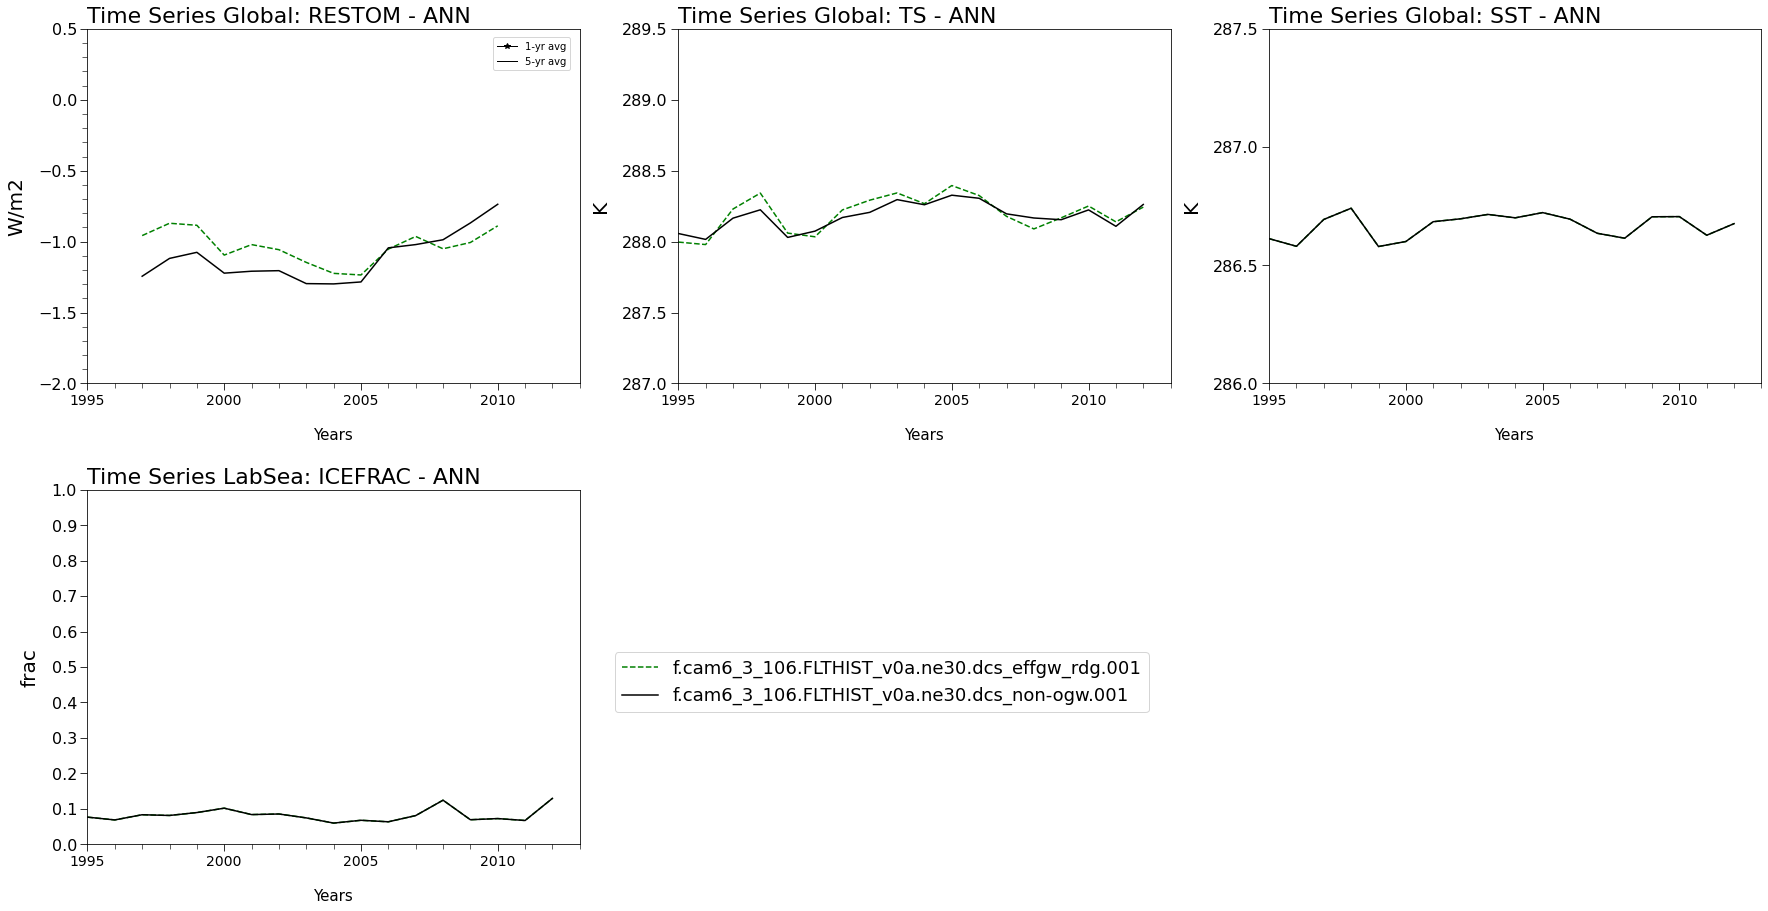

CPU times: user 1.72 s, sys: 647 ms, total: 2.37 s
Wall time: 3.58 s


In [46]:
%%time

fig = plt.figure(figsize=(30,15))

# Change the layout/number of subplots based off number of variables desired
rows = 2
cols = 3
gs = fig.add_gridspec(rows, cols, hspace=.3, wspace=.2)

# Subset for Lab Sea
'''
w = -64.+360
e = -44+360
s = 53
n = 67
'''
w = -63.5+360
e = -47.5+360
s = 53.5
n = 65.5
subset = {"s":s,"n":n,"e":e,"w":w}

# Add more colors as needed for number of test cases
# ** Baseline is already added as green dashed line in plotting function **
# matplotlib colors here: https://matplotlib.org/stable/gallery/color/named_colors.html
colors = ["k", "aqua", "orange", "b", "magenta", "goldenrod", "slategrey", "rosybrown"]

case_names_len = len(case_names)

# Loop over variables:
for i,var in enumerate(ts_var_list):
        
    print("Plotting variable:",var)
        
    if var == "RESTOM":
        ax = plt.subplot(gs[0, 0])
    if var == "TS":
        ax = plt.subplot(gs[0, 1])
    if var == "SST":
        ax = plt.subplot(gs[0, 2])
    if var == "ICEFRAC":
        ax = plt.subplot(gs[1, 0])
        
        
    # Grab baseline case:
    #--------------------

    if var == "RESTOM":            
        avg_base_FSNT,yrs_base,unit = _data_calcs(data_ts_loc,'FSNT')
        avg_base_FLNT,_,_ = _data_calcs(data_ts_loc,"FLNT")
        if len(yrs_base) < 5:
            print(f"Not a lot of climo years for {data_name}, only doing 1-yr avg for RESTOM...")
            FSNT_base = avg_base_FSNT
            FLNT_base = avg_base_FLNT
        else:
            FSNT_base = avg_base_FSNT.rolling(time=60,center=True).mean()
            FLNT_base = avg_base_FLNT.rolling(time=60,center=True).mean()

        avg_base = FSNT_base - FLNT_base
            
    if (var == "TS" or var == "SST"):
        avg_base,yrs_base,unit = _data_calcs(data_ts_loc,var)
                
    if var == "ICEFRAC":
        avg_base,yrs_base,unit = _data_calcs(data_ts_loc,var,subset)
    
    # Get int of years for plotting on x-axis
    yrs_base_int = yrs_base.astype(int)

    # Create yearly averages
    vals_base = [avg_base.sel(time=i).mean() for i in yrs_base]
        
    color_dict = {"color":"g","marker":"--"}
    ax = ts_plot(ax, data_name, vals_base, yrs_base_int, unit, color_dict)
        
        
    # Loop over test cases:
    #----------------------
        
    # Create lists to hold all sets of years (for each case) and
    # sets of var data (for each case)
    vals_cases = []
    yrs_cases = []
    for case_idx, case_name in enumerate(case_names):

        if var == "RESTOM":
            avg_case_FSNT,yrs_case,unit = _data_calcs(case_ts_loc[case_idx],'FSNT')
            avg_case_FLNT,_,_ = _data_calcs(case_ts_loc[case_idx],"FLNT")
            if len(yrs_case) < 5:
                print(f"Not a lot of climo years for {case_name}, only doing 1-yr avg for RESTOM...")
                FSNT_case = avg_case_FSNT
                FLNT_case = avg_case_FLNT
                color_dict = {"color":colors[case_idx],"marker":"-*"}
            else:
                FSNT_case = avg_case_FSNT.rolling(time=60,center=True).mean()
                FLNT_case = avg_case_FLNT.rolling(time=60,center=True).mean()
                color_dict = {"color":colors[case_idx],"marker":"-"}

            avg_case = FSNT_case - FLNT_case

        if (var == "TS" or var == "SST"):
            avg_case,yrs_case,unit = _data_calcs(case_ts_loc[case_idx],var)
            color_dict = {"color":colors[case_idx],"marker":"-"}
                
        if var == "ICEFRAC":
            avg_case,yrs_case,unit = _data_calcs(case_ts_loc[case_idx],var,subset)
            color_dict = {"color":colors[case_idx],"marker":"-"}
                
        # Get yearly averages for all available years
        vals_case = [avg_case.sel(time=i).mean() for i in yrs_case]
        vals_cases.append(vals_case)
            
        # Get int of years for plotting on x-axis
        yrs_case_int = yrs_case.astype(int)
        yrs_cases.append(yrs_case_int)
        
        # Add case to plot (ax)
        ax = ts_plot(ax, case_name, vals_case, yrs_case_int, unit, color_dict)

    # End for (case names)

    # Get variable details
    ax = plot_var_details(ax, var, vals_cases, vals_base)
        
    # Grab the earliest and latest climo years of all cases excluding baseline
    yrs_cases_min = min([min(i) for i in yrs_cases])
    yrs_cases_max = max([max(i) for i in yrs_cases])
    
    max_year = max([yrs_cases_max,max(yrs_base_int)])
    min_year = min(yrs_cases_min,min(yrs_base_int))
    # Set the x-axis plot limits
    # to guarantee data from all cases (including baseline) are on plot
    ax.set_xlim(min_year, max_year+1)
    
    print(max_year)
    # x-axis ticks and numbers
    if len(yrs_cases[0]) > 120:
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
    if 10 <= len(yrs_cases[0]) <= 120:
        ax.xaxis.set_major_locator(MultipleLocator(5))
        ax.xaxis.set_minor_locator(MultipleLocator(1))
    if 0 < len(yrs_cases[0]) < 10:
        ax.xaxis.set_major_locator(MultipleLocator(1))
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        
    # End for (case loop)
# End for (variables loop)

# Set up legend
# If custom_legend = True, change the code in make_fig_legend() function for custom legend
fig = make_fig_legend(ax, fig, fontsize=18, custom_legend=False) 
#plt.savefig(f"{plot_path}TimeSeries_ANN.png", facecolor='w',bbox_inches="tight")
plt.show()

```{note}
You can run these types of analysis in the previous
```